In [1]:
import numpy as np 
from scipy import optimize as op 

In [2]:
# 给出变量取值范围
x1=(0,7)  
x2=(0,7)
x3=(0,7)

In [3]:
c=np.array([-2,-3,5])   # 目标函数系数,3x1列向量
A=np.array([[-2,5,-1],[1,3,1]]) # 不等式约束系数A，2x3维矩阵
b=np.array([-10,12])  # 等式约束系数b, 2x1维列向量
A_eq=np.array([[1,1,1]])  # 等式约束系数Aeq，3x1维列向量
b_eq=np.array([7])   # 等式约束系数beq，1x1数值

In [4]:
res=op.linprog(c,A,b,A_eq,b_eq,bounds=(x1,x2,x3)) #调用函数进行求解
res

     con: array([1.19830323e-08])
     fun: -14.571428542312137
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-3.70230904e-08,  3.85714287e+00])
  status: 0
 success: True
       x: array([6.42857141e+00, 5.71428573e-01, 9.82192085e-10])

In [5]:
#导入相关库
import numpy as np
from scipy import optimize as op

#定义决策变量范围
x1=(0,None)
x2=(0,None)
x3=(0,None)

#定义目标函数系数
c=np.array([2,3,1]) 

#定义约束条件系数
A_ub=np.array([[-1,-4,-2],[-3,-2,0]])
B_ub=np.array([-10,-6])

#求解
res=op.linprog(c,A_ub,B_ub,bounds=(x1,x2,x3))
res

     con: array([], dtype=float64)
     fun: 8.000000000000306
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 8.81072992e-13, -2.70006240e-13])
  status: 0
 success: True
       x: array([0.91155217, 1.63267174, 1.27888043])

In [6]:
import numpy as np
from scipy.optimize import minimize

In [7]:
# 定义目标函数
def objective(x):
    return x[0] ** 2 + x[1]**2 + x[2]**2 +8

# 定义约束条件
def constraint1(x):
    return x[0] ** 2 - x[1] + x[2]**2  # 不等约束

def constraint2(x):
    return -(x[0] + x[1]**2 + x[2]**2-20)  # 不等约束

def constraint3(x):
    return -x[0] - x[1]**2 + 2        # 等式约束

def constraint4(x):
    return x[1] + 2*x[2]**2 -3           # 等式约束

In [8]:
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'eq', 'fun': constraint3}
con4 = {'type': 'eq', 'fun': constraint4}

# 4个约束条件
cons = ([con1, con2, con3,con4])  

# 决策变量的符号约束
b = (0.0, None) #即决策变量的取值范围为大于等于0
bnds = (b, b ,b) 

In [9]:
x0=np.array([0, 0, 0]) #定义初始值
solution = minimize(objective, x0, method='SLSQP', \
                    bounds=bnds, constraints=cons)

In [10]:
x = solution.x

print('目标值: ' + str(objective(x)))
print('最优解为')
print('x1 = ' + str(round(x[0],2)))
print('x2 = ' + str(round(x[1],2)))
print('x3 = ' + str(round(x[2],2)))
solution

目标值: 10.651091840572583
最优解为
x1 = 0.55
x2 = 1.2
x3 = 0.95


     fun: 10.651091840572583
     jac: array([1.10433471, 2.40651834, 1.89564812])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.55216734, 1.20325918, 0.94782404])

Text(0, 0.5, 'Profit')

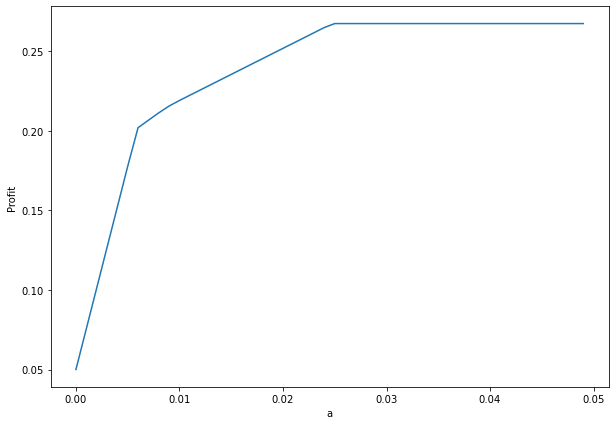

In [11]:
#导入相关库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as op

#定义a的取值
a = 0
profit_list = [] #记录最大收益
a_list = [] #记录a的取值


while a<0.05:
    #定义决策变量取值范围
    x1=(0,None)

    #定义目标函数系数
    c=np.array([-0.05,-0.27,-0.19,-0.185,-0.185]) 
    #定义不等式约束条件左边系数
    A = np.hstack((np.zeros((4,1)),np.diag([0.025,0.015,0.055,0.026])))
    #定义不等式约束条件右边系数
    b=a*np.ones((4,1));
    #定义等式约束条件左边系数
    Aeq=np.array([[1,1.01,1.02,1.045,1.065]])
    #定义等式约束条件右边系数
    beq=np.array([1]);
    #求解
    res=op.linprog(c,A,b,Aeq,beq,bounds=(x1,x1,x1,x1,x1))
    profit = -res.fun
    profit_list.append(profit)
    a_list.append(a)
    a = a+0.001

#绘制风险偏好a与最大收益的曲线图    
plt.figure(figsize=(10,7))
plt.plot(a_list,profit_list)
plt.xlabel('a');plt.ylabel('Profit')